In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.svm import SVC

In [2]:
X, y = make_circles(n_samples=100, factor=0.1, noise=0.05, random_state=42)

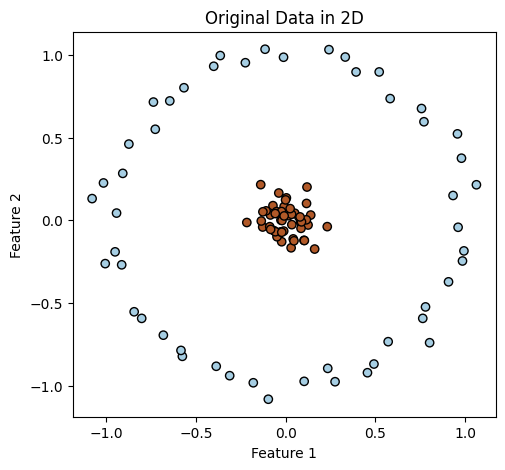

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Original Data in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [4]:
h = .01  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [5]:
svm_rbf = SVC(kernel='rbf', C=1e3, gamma=0.1)
svm_rbf.fit(X, y)

SVC(C=1000.0, gamma=0.1)

In [6]:
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

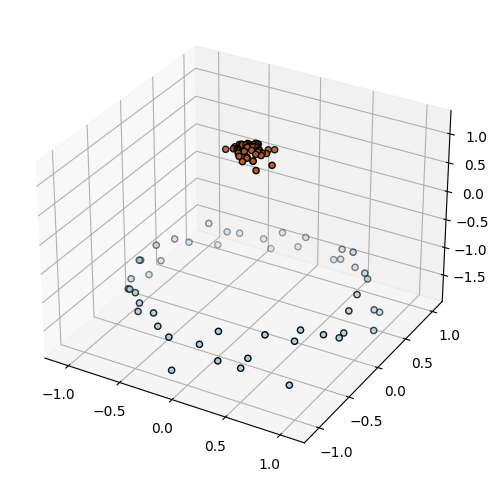

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], svm_rbf.decision_function(X), c=y, cmap=plt.cm.Paired, edgecolors='k')

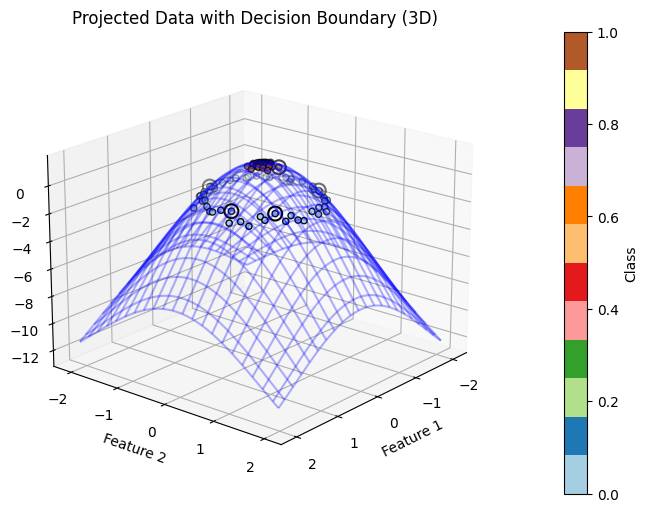

In [8]:
ax.plot_wireframe(xx, yy, Z, rstride=20, cstride=20, color='blue', alpha=0.3)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], svm_rbf.decision_function(X), c=y, cmap=plt.cm.Paired, edgecolors='k')

ax.plot_wireframe(xx, yy, Z, rstride=20, cstride=20, color='blue', alpha=0.3)

ax.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], 
           svm_rbf.decision_function(svm_rbf.support_vectors_), 
           s=100, facecolors='none', edgecolors='k', linewidths=1.5)

ax.set_title('Projected Data with Decision Boundary (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function Value')
ax.view_init(elev=20, azim=40)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Class')
plt.show()